# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [121]:
#import das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import analise_exploratoria as ae
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer



In [64]:
# Leitura dos dados
data = pd.read_csv('datasets/RHP_data.csv')

# Visualização dos dados
data.head()

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,NaN,Não Calculado,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,50.0,Normal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


In [3]:
# Quantidade de dados nulos
data.isnull().sum()

Id                   0
Peso               318
Altura               0
IMC               4727
Atendimento        983
DN                1376
IDADE             1376
Convenio          5304
PULSOS            1198
PA SISTOLICA      7730
PA DIASTOLICA     7740
PPA                217
B2                1179
SOPRO             1167
FC                2041
HDA 1             5414
HDA2             17221
SEXO                 4
MOTIVO1           1097
MOTIVO2           4778
dtype: int64

In [4]:
# Estatísticas descritivas
data.describe()

,Id,Peso,Altura,IMC,PA SISTOLICA,PA DIASTOLICA
count,17873.000000,17555.000000,17873.000000,13146.000000,10143.000000,10133.000000
mean,8937.000000,21.163520,83.865216,17.806329,101.314108,62.303661
std,5159.635016,18.061021,56.583610,12.071950,15.510066,8.885555
min,1.000000,-40.000000,0.000000,0.000000,10.000000,6.000000
25%,4469.000000,6.600000,36.000000,15.000000,90.000000,60.000000
50%,8937.000000,18.000000,99.000000,17.000000,100.000000,60.000000
75%,13405.000000,31.000000,130.000000,19.000000,110.000000,70.000000
max,17873.000000,157.000000,198.000000,848.000000,990.000000,120.000000


In [65]:
# padronização dos nomes das colunas
ae.padronizar_colunas(data)

In [55]:
# Distribuição das classes
cols = ['convenio','pulsos','ppa','b2', 'sexo', 'sopro', 'hda_1', 'hda_2', 'motivo_1', 'motivo_2']

ae.analisar_distribuicao(data,['motivo_1', 'sexo'])


Distribuição de classes na coluna 'motivo_1':
motivo_1
5 - Parecer cardiológico           7981
6 - Suspeita de cardiopatia        5863
1 - Cardiopatia já estabelecida    1428
2 - Check-up                       1048
7 - Outro                           456
Name: count, dtype: int64


Distribuição de classes na coluna 'sexo':
sexo
M                8930
F                6612
Indeterminado    1417
Masculino         584
Feminino          247
masculino          79
Name: count, dtype: int64




### Entendendo os dados
- **ID**: Identificação do paciente
- **Peso**: Peso do paciente
- **Altura**: Altura do paciente
- **IMC**: Índice de Massa Corporal
- **Atendimento**: Data do atendimento
- **DN**: Data de nascimento
- **Idade**: Idade do paciente
- **Convenio**: Convênio do paciente
- **Pulsos**: Pulso do paciente
- **PA Sistólica**: Pressão Arterial Sistólica
- **PA Diastólica**: Pressão Arterial Diastólica
- **PPA**: Pressão de Pulso Arterial
- **B2**: 
- **Sopro**: Sopro cardíaco
- **FC**: Frequência Cardíaca
- **HDA 1**: História de Doença Atual 1
- **HDA 2**: História de Doença Atual 2
- **Sexo**: Sexo do paciente
- **Motivo 1**: Motivo 1 da consulta
- **Motivo 2**: Motivo 2 da consulta

## Removendo colunas desnecessárias

In [66]:
#dropar colunas que não serão utilizadas
data.drop(columns=['atendimento', 'dn','convenio'], inplace=True)

## tratando dados nulos das colunas numericas


In [67]:
#colunas numericas
cols_numericas = ['peso', 'altura','idade', 'imc', 'pa_sistolica', 'pa_diastolica'] #fc tratar depois

#ae.tratar_dados_nulos(data, cols_numericas) todo: implementar essa função

for col in cols_numericas:
    data[col] = data[col].apply(lambda x: 0 if x == '#VALUE!' else float(x))
    data[col] = data[col].apply(lambda x: 0 if x < 0 else x)
    data[col] = data[col].fillna(0)

    
data[cols_numericas].isnull().sum()

peso             0
altura           0
idade            0
imc              0
pa_sistolica     0
pa_diastolica    0
dtype: int64

## tratando dados nulos das colunas categoricas

In [68]:
## TODO: implementar essa função
#colunas categoricas
cols_categoricas = [ 'pulsos', 'ppa', 'b2', 'sexo', 'sopro', 'hda_1', 'hda_2', 'motivo_1', 'motivo_2']

for col in cols_categoricas:
    data[col] = data[col].replace('#VALUE!', pd.NA)
    data[col] = data[col].fillna('Nao informado')
    data[col] = data[col].apply(lambda x: x.lower())

# em sexo, substituir 'masculino' por 'm' e 'feminino' por 'f'
data['sexo'] = data['sexo'].replace('masculino', 'm')
data['sexo'] = data['sexo'].replace('feminino', 'f')





### limpeza dos dados

- Peso

In [69]:
data.shape

(17873, 17)

<Axes: xlabel='peso', ylabel='Count'>

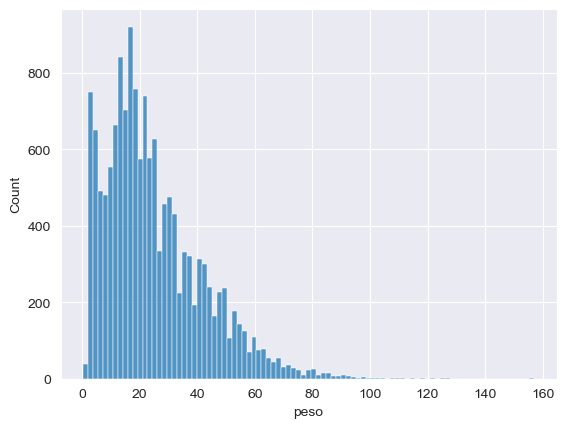

In [70]:
# removendo valores negativos
data = data[data['peso'] > 0] #analisando manualmente, quando os pesos sao 0, quase sempre a altura é 0 tambem, logo, são dados invalidos

#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['peso'])

<Axes: xlabel='peso', ylabel='Count'>

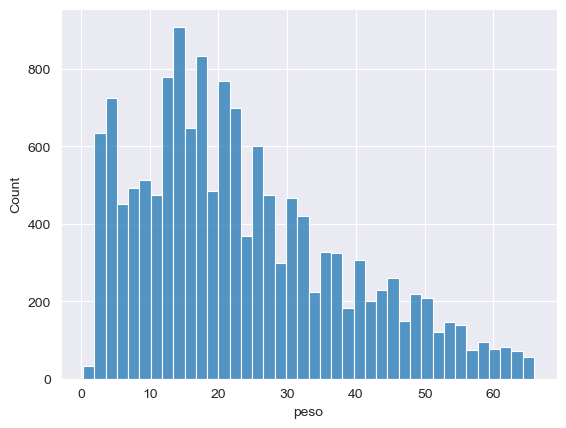

In [71]:
#ainda possui outliers para valores muito altos, então vamos remover
Q1 = data['peso'].quantile(0.25)
Q3 = data['peso'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
data = data[data['peso'] < limite_superior]

sns.histplot(data['peso'])

In [25]:
#TODO: REMOVER ESSA CELULA DPS
data.shape

(14447, 20)

### Limpando a altura

<Axes: xlabel='altura', ylabel='Count'>

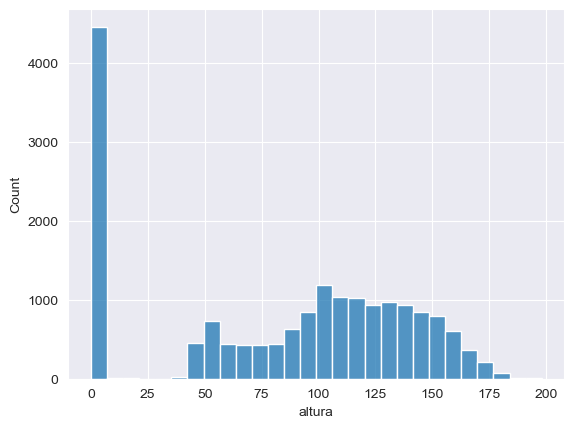

In [47]:
# plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['altura'])

In [61]:
#ver a quantidade de valores 0
data[(data['altura'] == 0)].shape

(4460, 20)

### Como para preencher os dados de altura usaremos a idade, vamos limpar idade antes

In [74]:
data.shape

(14541, 17)

In [76]:
#todo: implementar essa função
# tratando idade
#colocando valores negativos como 0
data['idade'] = data['idade'].apply(lambda x: 0 if x < 0 else x)

#removendo outliers, todo: transformar em função
Q1 = data['idade'].quantile(0.25)
Q3 = data['idade'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
data = data[data['idade'] < limite_superior]

#removendo valores 0
data = data[data['idade'] > 0] #todo: talvez mudar isso, 727 dados excluidos

#transformando idade em inteiro
data['idade'] = data['idade'].apply(lambda x: int(x))

## agora com idade tratada, vamos preencher os valores de altura

In [103]:
#todo: implementar essa função
def preencher_alturas(data):
    # Filtrar dados com altura conhecida e desconhecida
    df_treino = data[data['altura'] > 0].copy()
    df_teste = data[data['altura'] == 0].copy()
    
    # Criar variáveis dummy para 'sexo' (caso seja categórico)
    df_treino = pd.get_dummies(df_treino, columns=['sexo'], drop_first=True)
    df_teste = pd.get_dummies(df_teste, columns=['sexo'], drop_first=True)

    # Garantir que ambos os conjuntos têm as mesmas colunas
    df_teste = df_teste.reindex(columns=df_treino.columns, fill_value=0)

    # Atualizar lista de features após dummies
    features = [col for col in df_treino.columns if col not in ['altura']]

    # Dividir dados de treino
    X_train = df_treino[features]
    y_train = df_treino['altura']

    # Treinar modelo
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)

    # Prever alturas ausentes
    X_test = df_teste[features]
    data.loc[data['altura'] == 0, 'altura'] = modelo.predict(X_test)

    return data

data_aux = data[[ 'altura', 'sexo', 'idade']].copy()
data_aux = preencher_alturas(data_aux)

data['altura'] = data_aux['altura']


ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by RandomForestRegressor.

<Axes: xlabel='altura', ylabel='Count'>

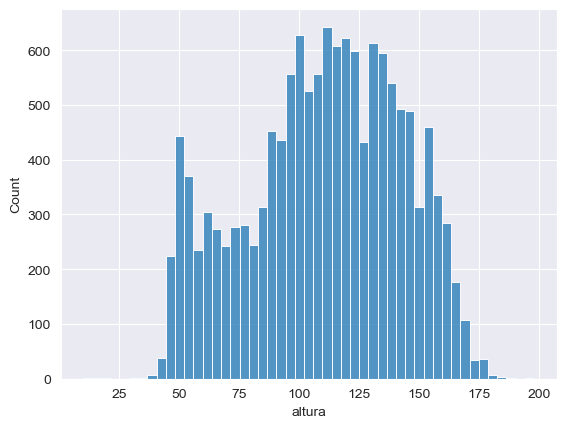

In [86]:
#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['altura'])

In [91]:
data.shape

(13814, 17)

### Limpando IMC

<Axes: xlabel='imc', ylabel='Count'>

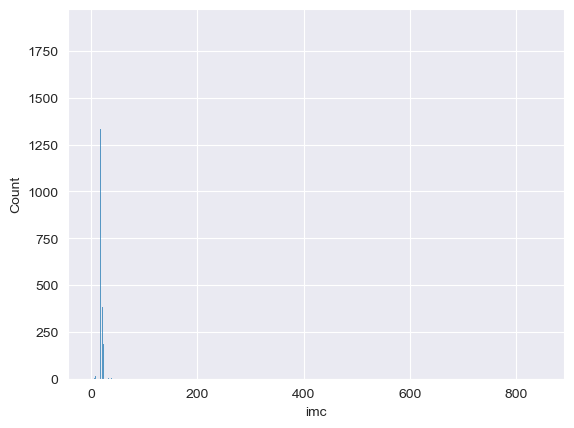

In [90]:
#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['imc'])

<Axes: xlabel='imc', ylabel='Count'>

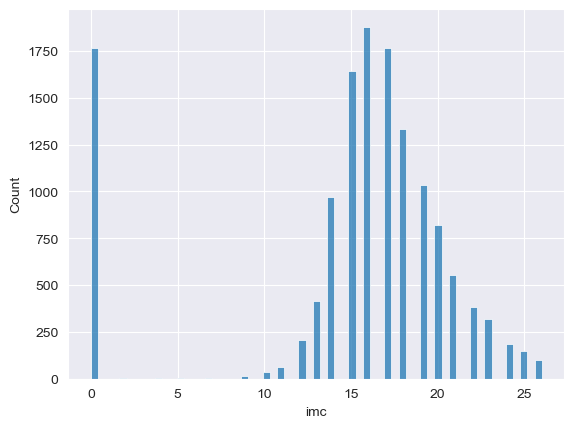

In [98]:
#tranformando em 0 os valores negativos
data['imc'] = data['imc'].apply(lambda x: 0 if x < 0 else x)

#transformando outliers em 0
Q1 = data['imc'].quantile(0.25)
Q3 = data['imc'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
data['imc'] = data['imc'].apply(lambda x: 0 if x > limite_superior else x)

#como temos altura e peso, podemos calcular o IMC para os valores 0
data.loc[data['imc'] == 0, 'imc'] = data['peso'] / (((data['altura'])/100) ** 2)

#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['imc'])

## aparentemente existem alturas inconsistentes em relacao ao peso, vamos remover esses dados

<Axes: xlabel='imc', ylabel='Count'>

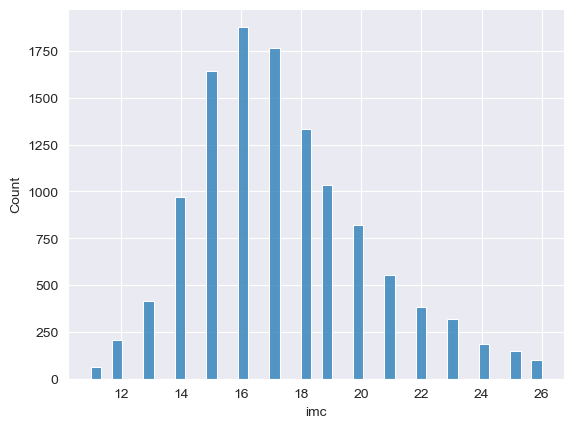

In [106]:
#removendo dados com imc <10, todo: talvez mudar isso, foi excluido muitos dados, +-1700
data = data[data['imc'] > 10]

#plotando um grafico para verificar a distribuição dos dados
sns.histplot(data['imc'])

## limpando pulsos

In [109]:
ae.analisar_distribuicao(data, ['pulsos'])

Distribuição de classes na coluna 'pulsos':
pulsos
normais                11452
nao informado            301
amplos                    23
outro                     21
femorais diminuidos       21
diminuídos                 4
Name: count, dtype: int64




In [110]:
#como são poucos dados como não informado, vamos remover
data = data[data['pulsos'] != 'nao informado']

## utilizando o knn para preencher os valores faltantes das demais colunas

In [127]:


def preencher_valores_nulos_knn(data, k=3):
    # Selecionar colunas que têm valores consistentes e que serão usadas para imputação
    cols_consistentes = ['id', 'peso', 'altura', 'imc', 'idade', 'sexo', 'pulsos']
    cols_imputar = ['pa_sistolica', 'pa_diastolica', 'ppa', 'b2', 'sopro', 'fc']
    cols_categ = ['hda_1', 'hda_2', 'motivo_1', 'motivo_2']

    # Criar uma cópia do DataFrame para não modificar o original
    data_copy = data.copy()

    # Transformar colunas categóricas em variáveis dummy
    data_copy = pd.get_dummies(data_copy, columns=cols_categ, drop_first=True)

    # Combinar colunas consistentes e colunas a serem imputadas
    all_cols = cols_consistentes + cols_imputar + [col for col in data_copy.columns if col not in cols_consistentes + cols_imputar]

    data_combined = data_copy[all_cols]

    # Inicializar o KNN Imputer com k=3
    imputer = KNNImputer(n_neighbors=k)

    # Imputar os valores nulos
    data_imputed = pd.DataFrame(imputer.fit_transform(data_combined), columns=all_cols)

    # Atualizar o DataFrame original com os valores imputados
    data_copy.update(data_imputed)

    return data_copy

# Exemplo de uso:
data_aux = preencher_valores_nulos_knn(data, k=3)


ValueError: could not convert string to float: 'm'

In [119]:
#plotando graficos com sns para verificar a distribuição dos dados
for col in colunas_nulas:
    sns.histplot(df_filled[col])
    plt.title(col)
    plt.show()



NameError: name 'colunas_nulas' is not defined

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.